<a href="https://colab.research.google.com/github/radhakrishnan-omotec/toenail-repo/blob/main/UtkarshTesting_Omotech_Toenail_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input


In [2]:
from google.colab import drive

In [7]:
# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

# Verify by listing the files in the drive
!ls /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'10 board exams .pdf'
'all books including adults.gsheet'
'backup backup sheet.gsheet'
'Book Exchange Drive (Aadhaya,Unnati,Utkarsh).gdoc'
 callido.gslides
 cambridge-igcse-and-o-level-additional-mathematics-coursebook-9781108411660-1108411665.pdf
'cancer drug.gdraw'
 CNN_nail_classification_model.keras
'Colab Notebooks'
'Computer IA .gsheet'
'Copia de Screenshot 2024-07-26 235251.png'
'Copia de Screenshot 2024-07-26 235302.png'
'Copia de Screenshot 2024-07-26 235318.png'
'Copia de Screenshot 2024-07-26 235333.png'
'Copia de Screenshot 2024-07-26 235347.png'
'Copia de Screenshot 2024-07-26 235357.png'
'Copia de Screenshot 2024-07-26 235406.png'
'Copia de Screenshot 2024-07-26 235418.png'
'Copia de Screenshot 2024-07-26 235431.png'
'Copia de Screenshot 2024-07-26 235441.png'
'Copia de Screenshot 2024-07-26 235447.png'
'Copia de Screenshot 2024-07-26 235458.png

In [5]:
classes_dict = {
0:'Class_1_-_Tinea_unguium',
1:'Class_2_-_Paronychia',
2:'AppClass_3_-_Ingrown_Toenail',
3:'Class_4_-_Nail_Psoriasis',
4:'Class_5_-_Erythrasma',
5:'Class_6_-_Toenail_Melanoma',
6:'Class_7_-_Onychodystrophy',
7:'Class_8_-_Subungual_Hematoma',
8:'Class_9_-_Pincer_Nail',
9:'Class_10_-_Nail_Dystrophy',
}


# Remove underscores from the dictionary values
classes_dict_cleaned = {key: value.replace('_', ' ') for key, value in classes_dict.items()}

# Function to make predictions



In [8]:
"""
    This function takes an image file path, loads a pre-trained model,
    preprocesses the image, and makes a prediction using the model.

    Parameters:
    - path: The path to the input image.
    - model: The pre-trained model for classification.
    - classes_dict: A dictionary mapping class indices to human-readable labels.

    Returns:
    - img: The original input image.
    - predicted_class: The predicted class label.
    """

'\n    This function takes an image file path, loads a pre-trained model,\n    preprocesses the image, and makes a prediction using the model.\n\n    Parameters:\n    - path: The path to the input image.\n    - model: The pre-trained model for classification.\n    - classes_dict: A dictionary mapping class indices to human-readable labels.\n\n    Returns:\n    - img: The original input image.\n    - predicted_class: The predicted class label.\n    '

In [9]:

def prediction(path, model, classes_dict):
    # Load and preprocess the image
    img = load_img(path, target_size=(180, 180))  # Resizing the image to the model input size
    img_arr = img_to_array(img)                   # Convert image to array
    processed_img_arr = preprocess_input(img_arr) # Preprocess image for model compatibility

    # Expand image dimensions to match the input shape for the model (batch_size, height, width, channels)
    img_exp_dim = np.expand_dims(processed_img_arr, axis=0)

    # Make predictions using the model
    prediction_probabilities = model.predict(img_exp_dim)
    pred_class_index = np.argmax(prediction_probabilities)
    predicted_class = classes_dict[pred_class_index]
    predicted_probability = prediction_probabilities[0][pred_class_index]

    # Display the predicted class and probability
    print(f"Predicted Class: {predicted_class} with probability {predicted_probability:.2f}")

    # Plot the input image with the prediction
    plt.imshow(img)
    plt.axis('off')  # Remove axis
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

    return img, predicted_class



In [10]:
"""
    This function takes an image object from the user interface,
    loads a pre-trained model, and makes a prediction.

    Parameters:
    - image: The image object passed from the user interface.

    Returns:
    - img: The processed image.
    - predicted_class: The predicted class label.
    """

'\n    This function takes an image object from the user interface,\n    loads a pre-trained model, and makes a prediction.\n\n    Parameters:\n    - image: The image object passed from the user interface.\n\n    Returns:\n    - img: The processed image.\n    - predicted_class: The predicted class label.\n    '

classes_dict_cleaned :  {0: 'Class 1 - Tinea unguium', 1: 'Class 2 - Paronychia', 2: 'AppClass 3 - Ingrown Toenail', 3: 'Class 4 - Nail Psoriasis', 4: 'Class 5 - Erythrasma', 5: 'Class 6 - Toenail Melanoma', 6: 'Class 7 - Onychodystrophy', 7: 'Class 8 - Subungual Hematoma', 8: 'Class 9 - Pincer Nail', 9: 'Class 10 - Nail Dystrophy'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Predicted Class: Class 6 - Toenail Melanoma with probability 39.94


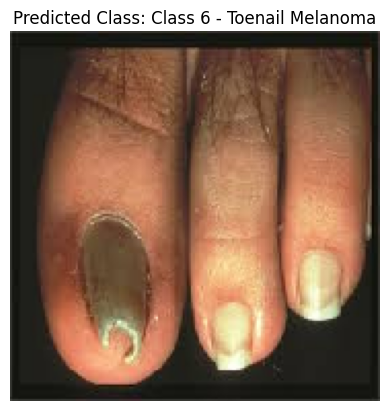

Final Predicted Class: Class 6 - Toenail Melanoma


In [12]:
# Function to load the model and perform prediction
def predict(image):

# Load the pre-trained model (ensure the path to your model is correct)
    model = load_model("/content/drive/MyDrive/CNN_nail_classification_model.keras")  # Adjust the path accordingly

    # Extract the file path from the image object
    path = image.name

    # Define your class dictionary mapping indices to class names
    print("classes_dict_cleaned : ",classes_dict_cleaned)

    # Call the prediction function
    img, predicted_class = prediction(path, model, classes_dict_cleaned)

    return img, predicted_class

# Main code to call the prediction function
if __name__ == "__main__":
    # Example path to an image
    image_path = "/content/drive/MyDrive/toenail-omotech/toenail_sample.jpeg"

    # Assuming image is an object similar to what would be passed by a UI (for testing)
    class ImageObject:
        def __init__(self, name):
            self.name = name

    # Create an image object
    image = ImageObject(image_path)

    # Call the predict function
    img, predicted_class = predict(image)

    # Optionally, print the predicted class for logging
    print(f"Final Predicted Class: {predicted_class}")